# **CCEM Image processing #2**

Introduction to data filtering, segmentation and features measurement

In [ ]:
# To run only if using jupyter notebook through binder
# Install the required packages in Jupyter kernel (internet connection required)
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install imageio
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install matplotlib_scalebar
!{sys.executable} -m pip install scikit-image
!{sys.executable} -m pip install scipy

In [1]:
# Libraries from tutorial #1
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_scalebar as Scalebar
import imageio as io

# Scipy and scikit-image libraries for simple image filtering, segmemtation and measurements  
import scipy.signal as signal
import skimage.filters as filters
import skimage.measure as measure

# Additional libraries for data visualization
from skimage.color import label2rgb

# Library from numpy to mask arrays
import numpy.ma as ma

Links to libraries documentation
1. Numpy ==> <https://numpy.org/doc/stable/reference/index.html>
2. imageio ==> <https://imageio.readthedocs.io/en/stable/reference/userapi.html>
3. matplotlib.pyplot ==> <https://matplotlib.org/stable/api/pyplot_summary.html>
4. matplotlib_scalebar ==> <https://pypi.org/project/matplotlib-scalebar/>
5. scikit-image ==> <https://scikit-image.org/docs/stable/api/api.html>
6. scipy ==> <https://scipy.github.io/devdocs/reference/index.html>

In [2]:
%matplotlib notebook

## Load and plot the data

0013_Ceta.tif file is a TEM image and blobs.tif is a generic image used in Fiji as an example. You can switch between
the two examples. Some parameters need to be adjusted to work properly in each case.

In [3]:
# Load the date with imageio

image = io.imread('0013_Ceta.tif')[:,:,0]
#image = io.imread('blobs.tif')
print(image)
print(np.shape(image))

[[134 134 134 ... 132 149 181]
 [139 139 139 ... 156 171 154]
 [118 118 118 ... 143 160 141]
 ...
 [ 19  19  19 ... 137 117 142]
 [ 29  29  29 ... 174 135 116]
 [ 10  10  10 ... 162 151 134]]
(2048, 2048)


<IPython.core.display.Javascript object>


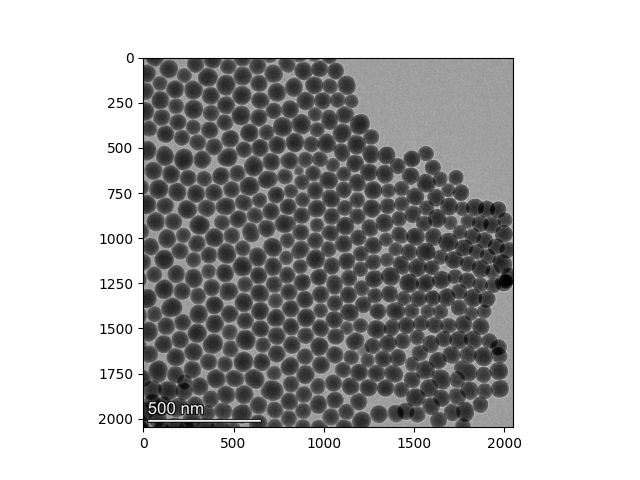

In [4]:
# Visualize the data with matplotlib

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image, cmap='gray')

plt.show()

## Gaussian smoothing 

Convolution of the image with a Gaussian kernel ==> Reduce noise at the cost of blurring

In [5]:
# 3x3 kernel of sigma = 1 pixel (not normalized)
gaussian_kernel_3x3 = np.array([
    [1, 2, 1], 
    [1, 4, 1], 
    [1, 2, 1]
])
print(gaussian_kernel_3x3)

[[1 2 1]
 [1 4 1]
 [1 2 1]]


In [6]:
# Normalize the gaussian kernel

gaussian_kernel_3x3_norm = gaussian_kernel_3x3 / np.sum(gaussian_kernel_3x3)
print(gaussian_kernel_3x3_norm)

[[0.07142857 0.14285714 0.07142857]
 [0.07142857 0.28571429 0.07142857]
 [0.07142857 0.14285714 0.07142857]]


In [7]:
# Convolve the gaussian kernel with the image to output a smoothed image

image_smooth_3x3 = signal.convolve2d(image, gaussian_kernel_3x3_norm)

<IPython.core.display.Javascript object>


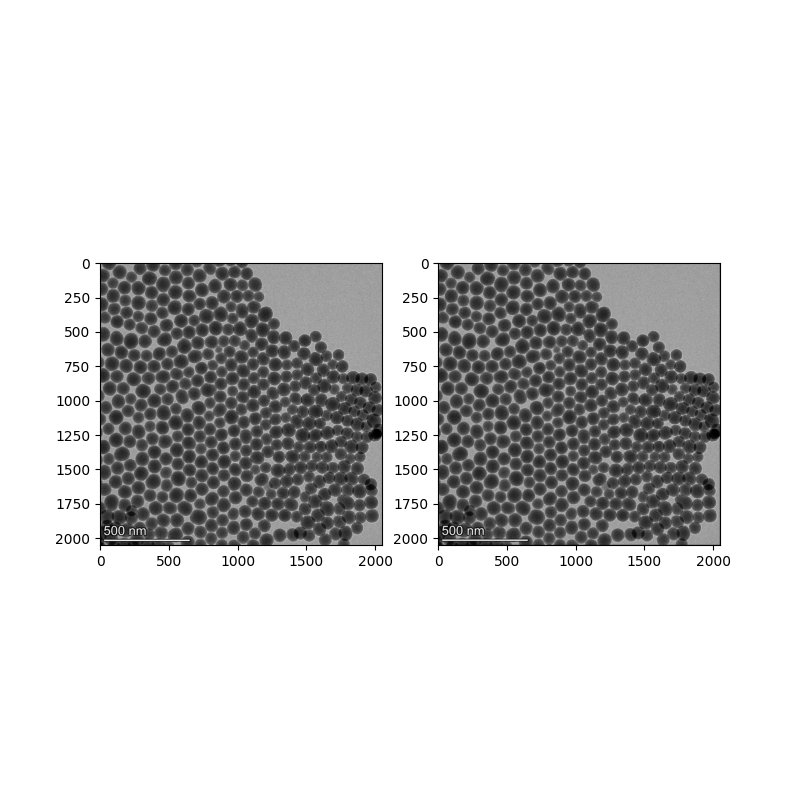

In [8]:
# Plot the original image and the smoothed image
fig = plt.figure(figsize=(8, 8))
ax_left = fig.add_subplot(121)
ax_right = fig.add_subplot(122, sharex=ax_left, sharey=ax_left)
ax_left.imshow(image, cmap='gray')
ax_right.imshow(image_smooth_3x3, cmap='gray')

plt.show()

In [9]:
# 5x5 kernel of sigma = 1 pixel
# Create, normalize, and display the kernel

gaussian_kernel_5x5 = np.array([
    [1,  4,  7,  4, 1], 
    [4, 16, 26, 16, 4], 
    [7, 26, 41, 26, 7], 
    [4, 16, 26, 16, 4], 
    [1,  4,  7,  4, 1]
])
gaussian_kernel_5x5_norm = gaussian_kernel_5x5 / np.sum(gaussian_kernel_5x5)
print(gaussian_kernel_5x5, '\n', gaussian_kernel_5x5_norm)

[[ 1  4  7  4  1]
 [ 4 16 26 16  4]
 [ 7 26 41 26  7]
 [ 4 16 26 16  4]
 [ 1  4  7  4  1]] 
 [[0.003663   0.01465201 0.02564103 0.01465201 0.003663  ]
 [0.01465201 0.05860806 0.0952381  0.05860806 0.01465201]
 [0.02564103 0.0952381  0.15018315 0.0952381  0.02564103]
 [0.01465201 0.05860806 0.0952381  0.05860806 0.01465201]
 [0.003663   0.01465201 0.02564103 0.01465201 0.003663  ]]


In [10]:
# Convolve the original image with the 5x5 gaussian kernel
image_smooth_5x5 = signal.convolve2d(image, gaussian_kernel_5x5_norm)

<IPython.core.display.Javascript object>


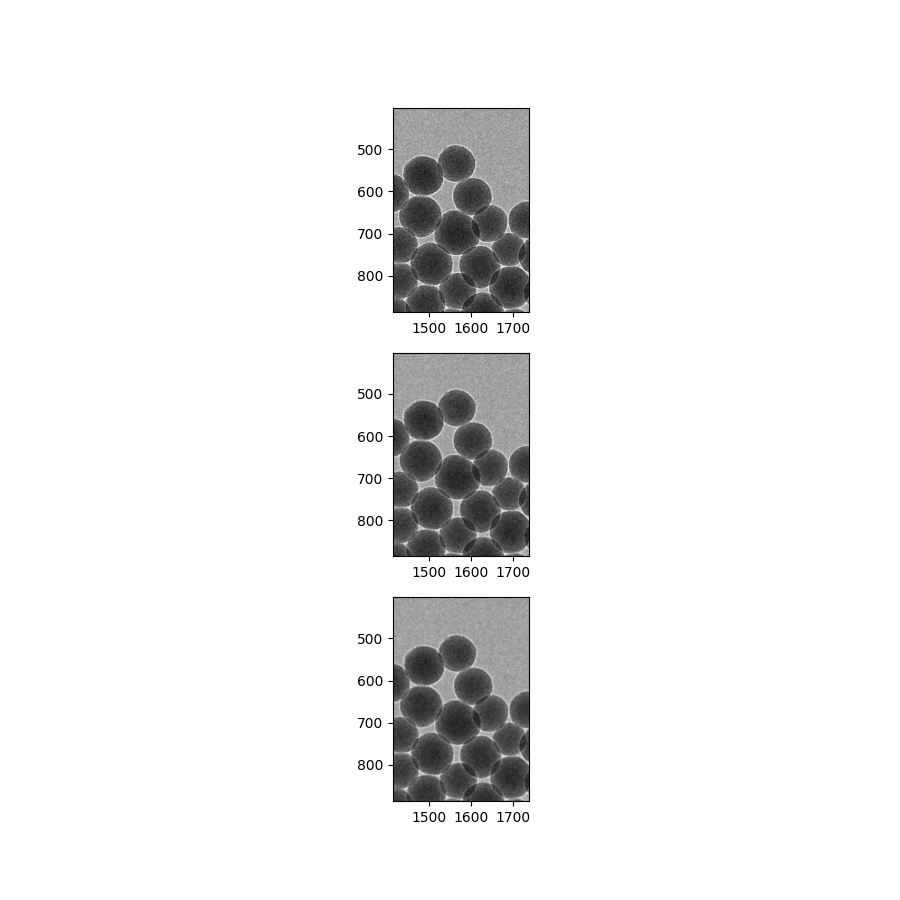

In [11]:
# Plot the original image and the two smoothed images
fig = plt.figure(figsize=(9,9))
ax_up = fig.add_subplot(311)
ax_middle = fig.add_subplot(312, sharex=ax_up, sharey=ax_up) 
ax_down = fig.add_subplot(313, sharex=ax_up, sharey=ax_up)
ax_up.imshow(image, cmap='gray')
ax_middle.imshow(image_smooth_3x3, cmap='gray')
ax_down.imshow(image_smooth_5x5, cmap='gray')

plt.show()

In [12]:
# Smooth the original image using the scikit-image gaussian function, with varying sigma values
image_smooth_sigma_1 = filters.gaussian(image, sigma=1, preserve_range=True)
image_smooth_sigma_2 = filters.gaussian(image, sigma=2, preserve_range=True)
image_smooth_sigma_4 = filters.gaussian(image, sigma=4, preserve_range=True)

# Asymmetrical kernels (x and y directions are different)
image_smooth_sigma_0x2 = filters.gaussian(image, sigma=[0,2], preserve_range=True)
image_smooth_sigma_2x0 = filters.gaussian(image, sigma=[2,0], preserve_range=True)
image_smooth_sigma_5x2 = filters.gaussian(image, sigma=[5,2], preserve_range=True)

<IPython.core.display.Javascript object>


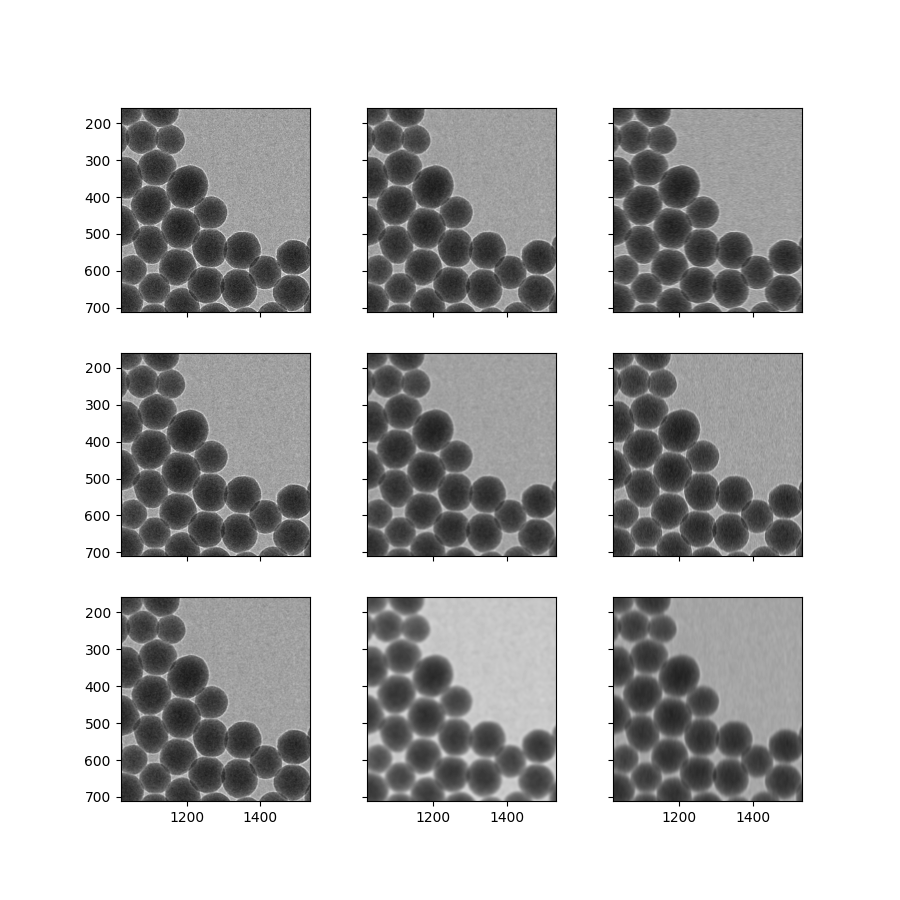

In [13]:
# plot the original image and all of the scikit-image smoothed images for comparison

fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(9,9))
axs[0, 0].imshow(image, cmap='gray')
axs[1, 0].imshow(image_smooth_3x3, cmap='gray')
axs[2, 0].imshow(image_smooth_5x5, cmap='gray')
axs[0, 1].imshow(image_smooth_sigma_1, cmap='gray')
axs[1, 1].imshow(image_smooth_sigma_2, cmap='gray')
axs[2, 1].imshow(image_smooth_sigma_4, cmap='gray')
axs[0, 2].imshow(image_smooth_sigma_0x2, cmap='gray')
axs[1, 2].imshow(image_smooth_sigma_2x0, cmap='gray')
axs[2, 2].imshow(image_smooth_sigma_5x2, cmap='gray')

plt.show()

<IPython.core.display.Javascript object>


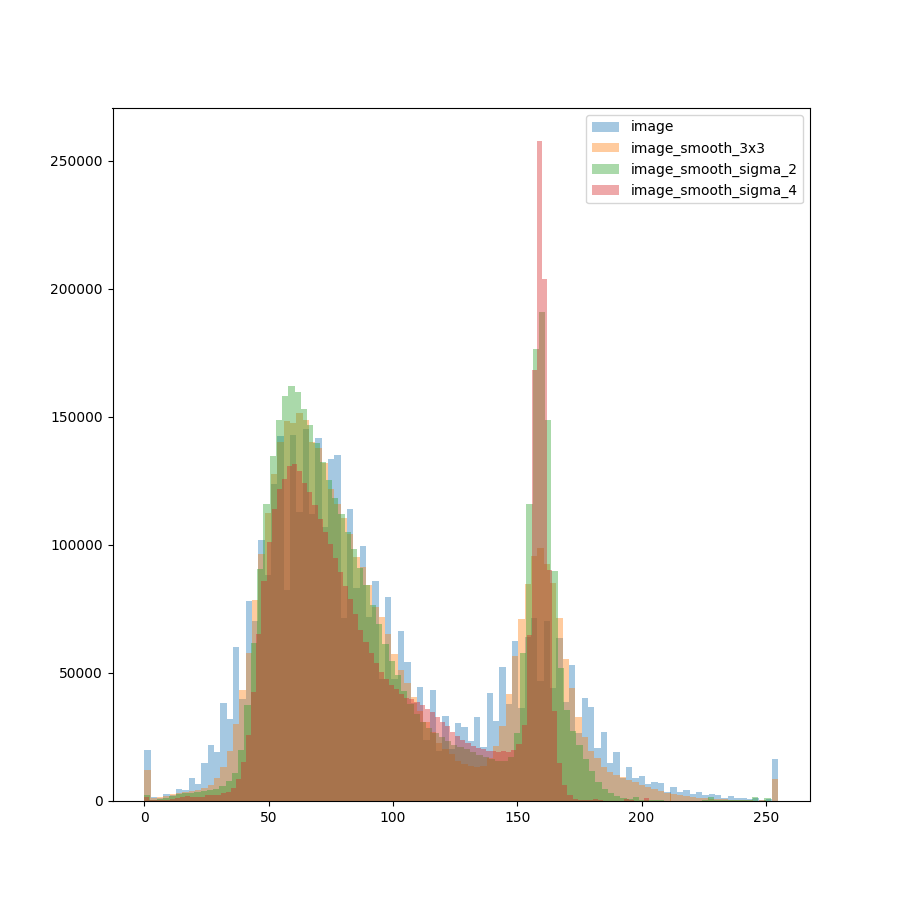

In [14]:
# plot the histograms of the original image, our homemade 3x3 kernel, 
# and two of the scikit-image smoothed images
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.hist(image.ravel(), 100, label='image', alpha=0.4)
ax.hist(image_smooth_3x3.ravel(), 100, alpha=0.4, label='image_smooth_3x3')
ax.hist(image_smooth_sigma_2.ravel(), 100, alpha=0.4, label='image_smooth_sigma_2')
ax.hist(image_smooth_sigma_4.ravel(), 100, alpha=0.4, label='image_smooth_sigma_4')
ax.legend()

plt.show()

<IPython.core.display.Javascript object>


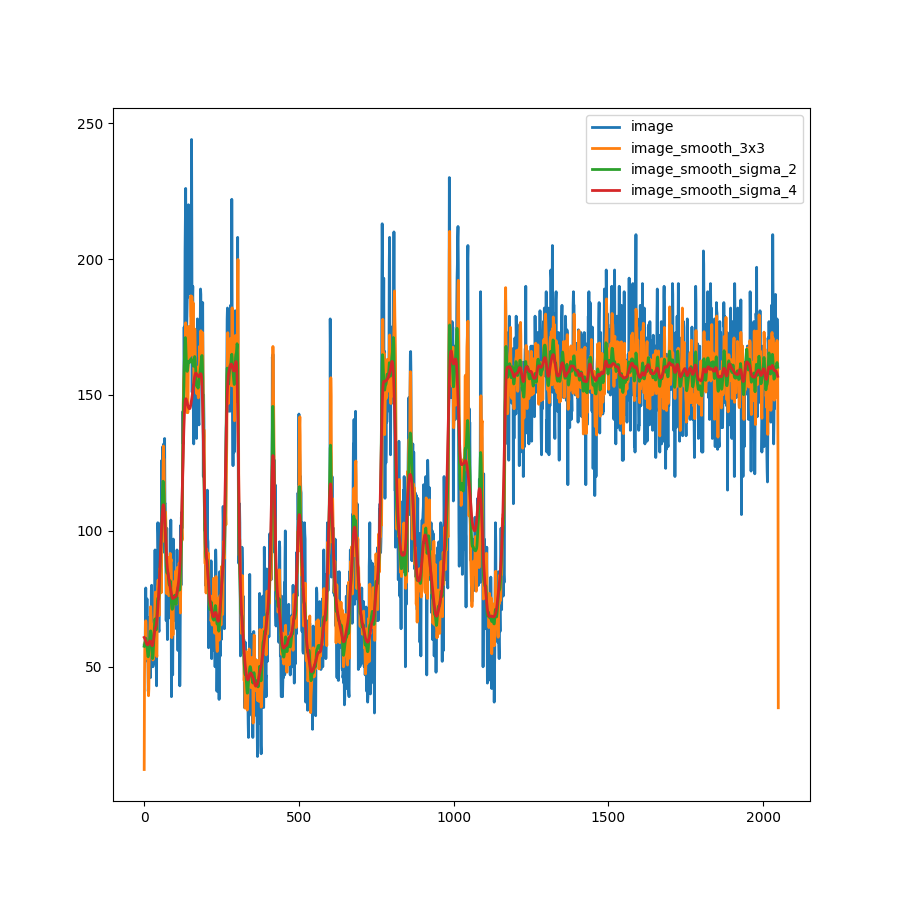

In [15]:
# plot a line profile across the original and smoothed images considered above

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.plot(image[120, :], linewidth=2, label='image')
ax.plot(image_smooth_3x3[120, :], linewidth=2, label='image_smooth_3x3')
ax.plot(image_smooth_sigma_2[120, :], linewidth=2, label='image_smooth_sigma_2')
ax.plot(image_smooth_sigma_4[120, :], linewidth=2, label='image_smooth_sigma_4')
ax.legend()

plt.show()

## Binarization

<IPython.core.display.Javascript object>


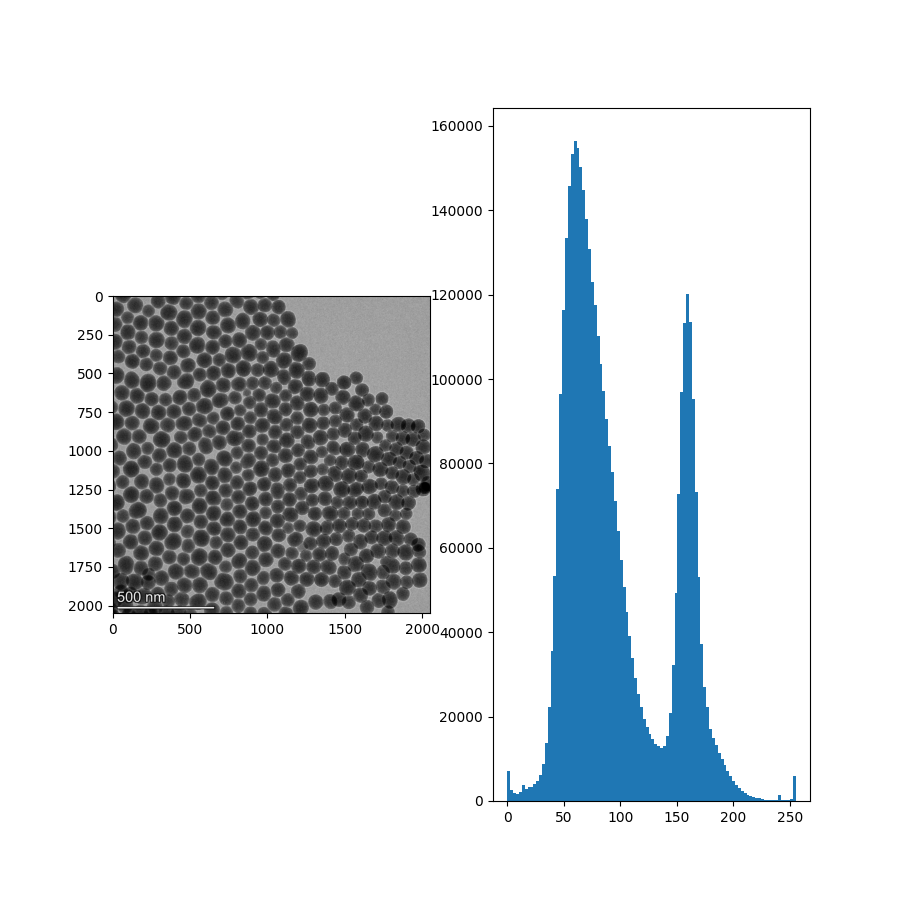

In [16]:
# Plot a gently smoothed image and visualize the histogram
fig = plt.figure(figsize=(9,9))
ax_left = fig.add_subplot(121)
ax_right = fig.add_subplot(122)
ax_left.imshow(image_smooth_sigma_1, cmap='gray')
ax_right.hist(image_smooth_sigma_1.ravel(), 100)
plt.show()

In [17]:
# Using a value chosen based on the histogram, apply a gray-level threshold to binarize the image
image_threshold = image_smooth_sigma_1 < 120
print(image_threshold)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]


In [18]:
# change the type of the image from binary (True/False) to integers (1s and 0s)
image_threshold = image_threshold.astype(int)
print(image_threshold)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


<IPython.core.display.Javascript object>


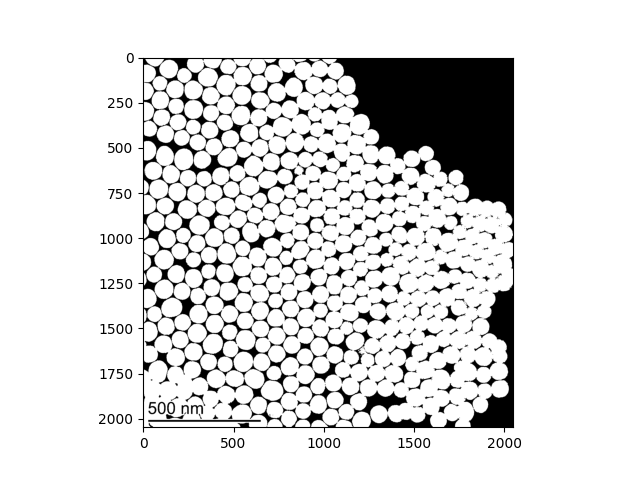

In [19]:
# plot the binarized image

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image_threshold, cmap='gray')

plt.show()

In [20]:
# Use an Otsu threshold algorithm to identify the optimal binarization gray value to 
# separate the dark and bright features

otsu = filters.threshold_otsu(image_smooth_sigma_1)
image_threshold_otsu = image_smooth_sigma_1 < otsu
print(otsu)

114.052734375


In [21]:
# Use an ISODATA algorithm to identify the optimal threshold to separate bright and dark features

iso_data = filters.threshold_isodata(image_smooth_sigma_1)
image_threshold_iso_data = image_smooth_sigma_1 < iso_data
print(iso_data)

114.052734375


In [22]:
# Use Yen's method to identify the optimal threshold value to separate bright and dark features

yen = filters.threshold_yen(image_smooth_sigma_1)
image_threshold_yen = image_smooth_sigma_1 < yen
print(yen)

94.130859375


<IPython.core.display.Javascript object>


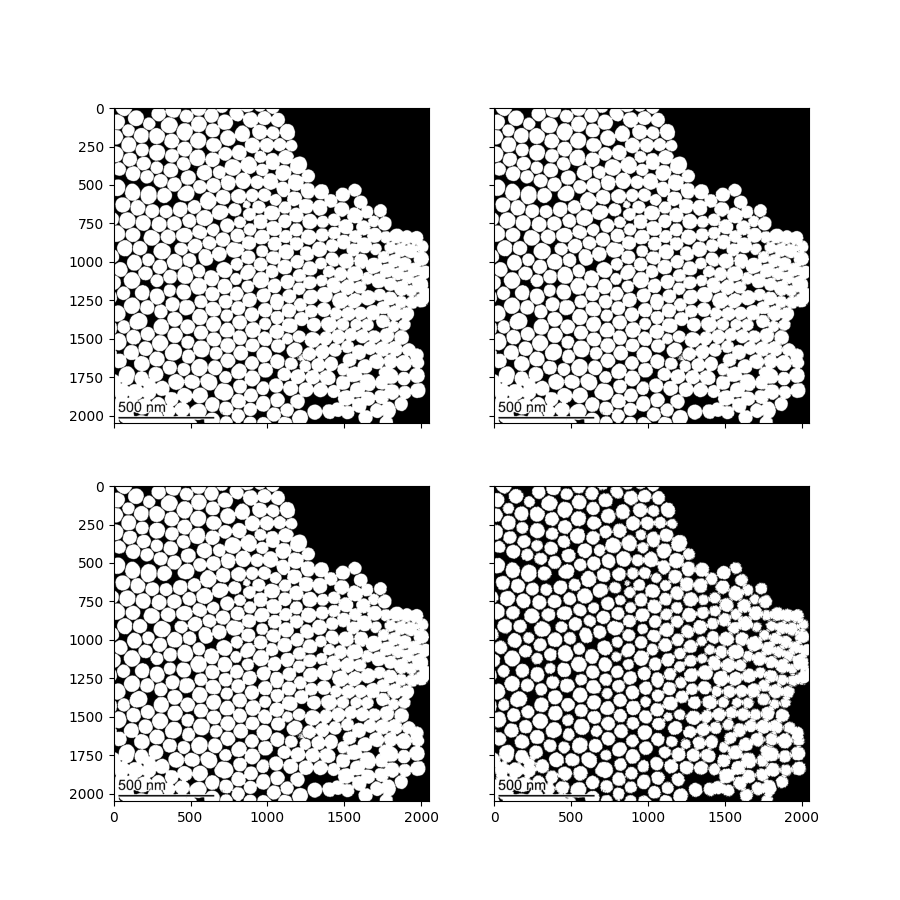

In [23]:
# Plot the four binarized images to compare the different methods

fig, axs = plt.subplots(2, 2, figsize=(9,9), sharex=True, sharey=True)
axs[0,0].imshow(image_threshold, cmap='gray') 
axs[1,0].imshow(image_threshold_otsu, cmap='gray')
axs[0,1].imshow(image_threshold_iso_data, cmap='gray') 
axs[1,1].imshow(image_threshold_yen, cmap='gray')
plt.show()

In [24]:
# An alternate method of applying a threshold, using numpy

image_threshold_alt = np.where(image_smooth_sigma_1 < 135, 1, 0)
print(image_threshold_alt)

[[1 1 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 1 0]
 [1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 0]]


<IPython.core.display.Javascript object>


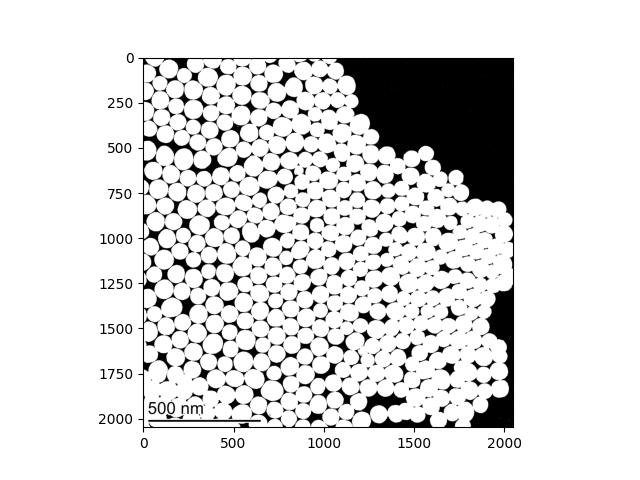

In [25]:
# plot the binarized image from the alternate threshold method

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image_threshold_alt, cmap='gray')

plt.show()

In [26]:
# A method of adaptive thresholding, sensitive to the local pixel neighbourhood, to separate foreground and background

image_threshold_local = filters.threshold_local(image_smooth_sigma_1, block_size=35)
print(image_threshold_local)

[[142.62233904 142.5204375  142.277402   ... 158.85826863 158.76051695
  158.70821742]
 [142.77525228 142.67352004 142.4309178  ... 158.87421876 158.78151423
  158.73186764]
 [143.0748655  142.97356967 142.73203084 ... 158.89832643 158.81528831
  158.7707254 ]
 ...
 [  9.90732319   9.90365935   9.90293042 ... 149.60817032 149.43537992
  149.3439937 ]
 [  9.8949178    9.88713154   9.87851411 ... 149.48302019 149.3057171
  149.21189248]
 [  9.89157197   9.88165147   9.86894916 ... 149.41826132 149.23852918
  149.14339448]]


<IPython.core.display.Javascript object>


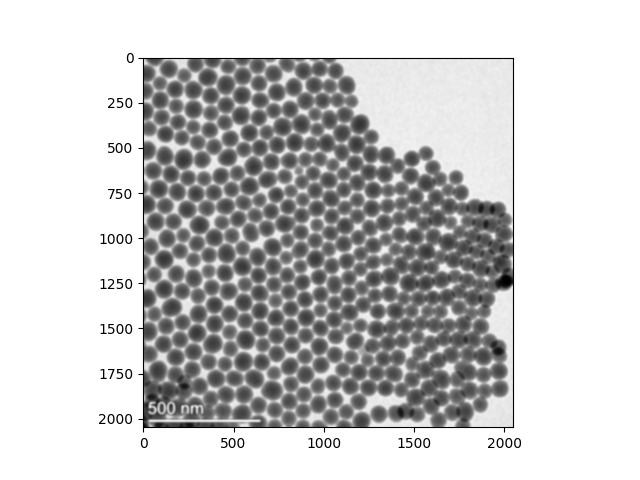

In [27]:
# plot the threshold image

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image_threshold_local, cmap='gray')

plt.show()

In [28]:
# apply the threshold image values as local thresholds to the input gently-smoothed image
# all pixels in the smoothed image higher than the value in the threshold image are 'foreground'

block_size = 35
local_thresh = filters.threshold_local(image_smooth_sigma_1, block_size, offset=10)
binary_local = image_smooth_sigma_1 < local_thresh
binary_local = binary_local.astype(int)

print(binary_local)

[[0 0 0 ... 1 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 1 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


<IPython.core.display.Javascript object>


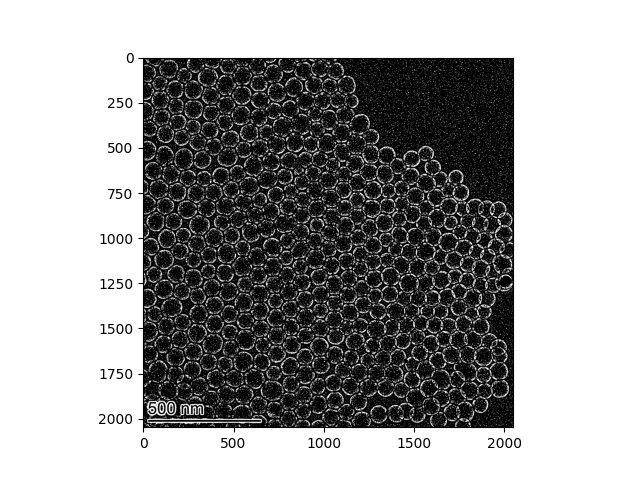

In [29]:
# plot the resulting binarized image

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(binary_local, cmap='gray')

plt.show()

## Segmentation // Labelling

In [30]:
# Identify and label connected regions of the binarized image (for particle counting)

labels_image_threshold = measure.label(image_threshold_otsu, background=0, return_num=True, connectivity = 1)
print(labels_image_threshold)

(array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [171, 171, 171, ...,   0,   0,   0],
       [171, 171, 171, ...,   0,   0,   0],
       [171, 171, 171, ...,   0,   0,   0]]), 228)


In [31]:
print('First element ', labels_image_threshold[0])
print('Second element ', labels_image_threshold[1])

First element  [[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [171 171 171 ...   0   0   0]
 [171 171 171 ...   0   0   0]
 [171 171 171 ...   0   0   0]]
Second element  228


In [32]:
# Special colormap changing colors for each label
labels_display = label2rgb(labels_image_threshold[0], image=image_threshold_otsu, bg_label=0)

<IPython.core.display.Javascript object>


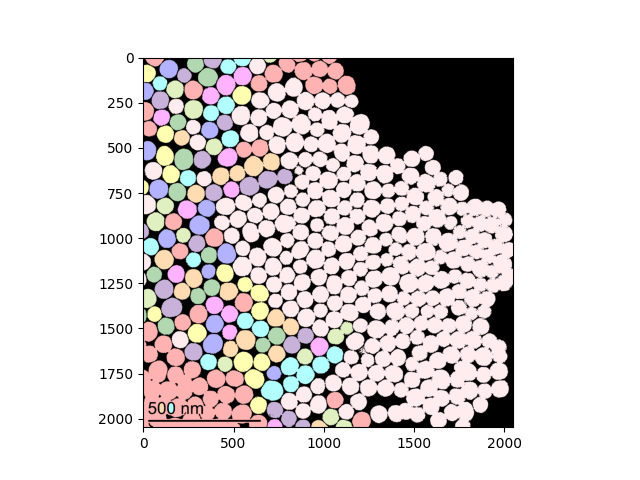

In [33]:
fig, ax = plt.subplots()
im_display = ax.imshow(labels_display)

plt.show()

<IPython.core.display.Javascript object>


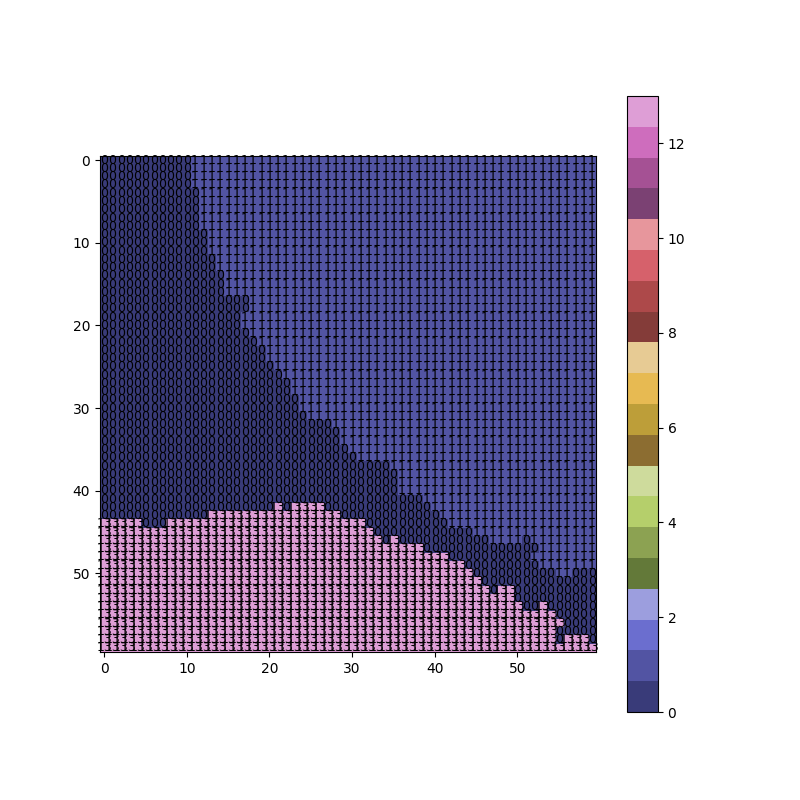

In [34]:
# Plot the labelled image, complete with labels for each identified region

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
im_disp = ax.imshow(labels_image_threshold[0][0:60, 0:60], cmap='tab20b')
plt.colorbar(im_disp, ax=ax)

for index, label in np.ndenumerate(labels_image_threshold[0][0:60, 0:60]):
    ax.annotate(label, (index[1], index[0]), horizontalalignment='center', verticalalignment='center', size=9)

plt.show()

<IPython.core.display.Javascript object>


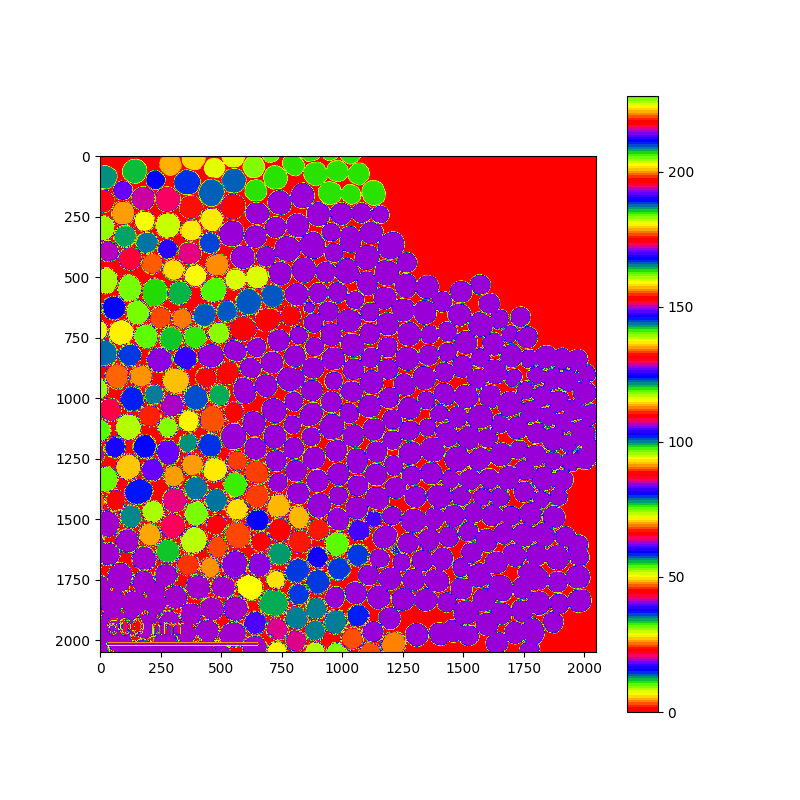

In [35]:
# plot the labelled image, using colours to identify different regions

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
im_disp = ax.imshow(labels_image_threshold[0], cmap='prism')
plt.colorbar(im_disp, ax=ax)
plt.show()

<IPython.core.display.Javascript object>


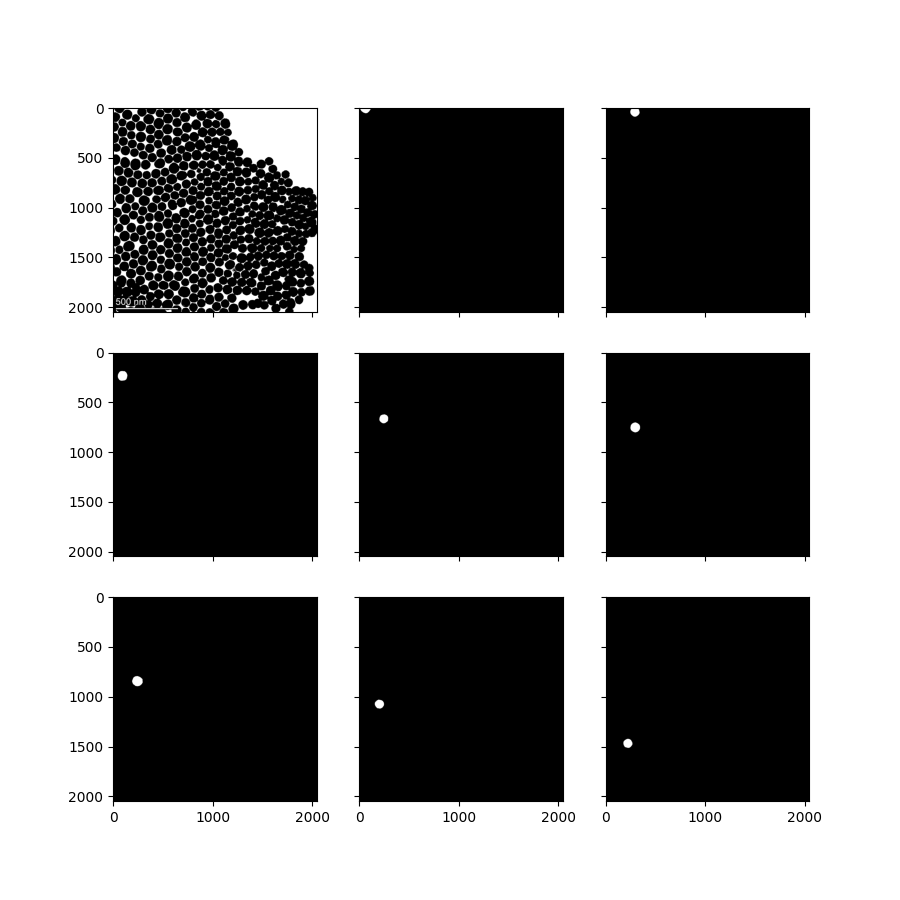

In [36]:
# select and plot individual regions from the labelled image
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(9,9))
axs[0, 0].imshow(labels_image_threshold[0]==0, cmap='gray')
axs[0, 1].imshow(labels_image_threshold[0]==1, cmap='gray')
axs[0, 2].imshow(labels_image_threshold[0]==5, cmap='gray')
axs[1, 0].imshow(labels_image_threshold[0]==26, cmap='gray')
axs[1, 1].imshow(labels_image_threshold[0]==68, cmap='gray')
axs[1, 2].imshow(labels_image_threshold[0]==77, cmap='gray')
axs[2, 0].imshow(labels_image_threshold[0]==84, cmap='gray')
axs[2, 1].imshow(labels_image_threshold[0]==111, cmap='gray')
axs[2, 2].imshow(labels_image_threshold[0]==161, cmap='gray')

plt.show()

In [37]:
# Introduce numpy masked arrays, using the labelled image as a mask for the smoothed image

image_smooth_sigma_1_masked_background = ma.masked_array(image_smooth_sigma_1, mask=labels_image_threshold[0]==0)

In [38]:
# Print the masked array

print(image_smooth_sigma_1_masked_background)
print(np.shape(image_smooth_sigma_1_masked_background))

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [16.38802748094187 16.34680253850393 15.83617728380735 ... -- -- --]
 [19.36924372963308 19.31045064219586 18.582816202473083 ... -- -- --]
 [15.050830220293598 15.00852187413774 14.480412605785247 ... -- -- --]]
(2048, 2048)


<IPython.core.display.Javascript object>


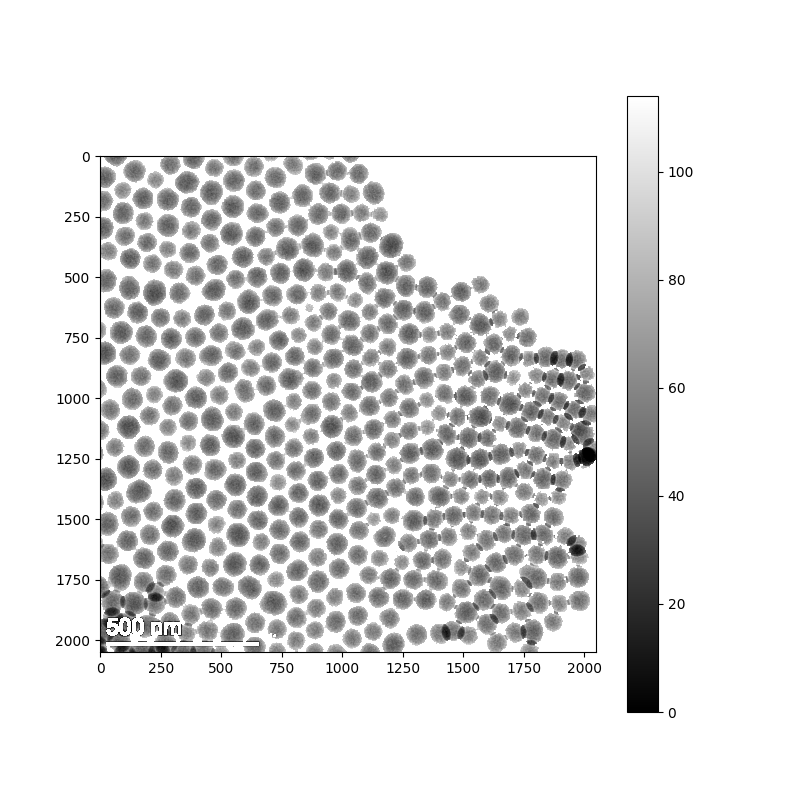

In [39]:
# plot the masked array

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
im_disp = ax.imshow(image_smooth_sigma_1_masked_background, cmap='gray')
plt.colorbar(im_disp, ax=ax)
plt.show()

In [40]:
# Make a masked array using only a single labelled region
image_smooth_sigma_1_masked_label_68 = ma.masked_array(
    image_smooth_sigma_1, 
    mask=np.invert(labels_image_threshold[0]==68)
)

<IPython.core.display.Javascript object>


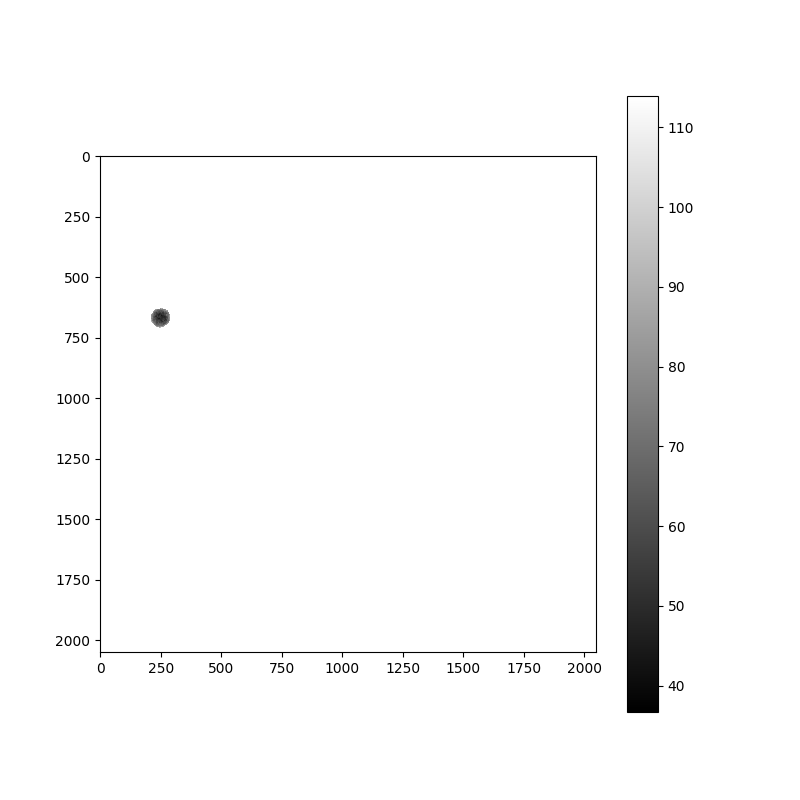

In [41]:
# Plot this masked single labelled region
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
im_disp = ax.imshow(image_smooth_sigma_1_masked_label_68, cmap='gray')
plt.colorbar(im_disp, ax=ax)
plt.show()

## Simple measurements of features

In [42]:
# Measure couple of properties of labelled regions excluding the region with label 0 (background)
properties = measure.regionprops(labels_image_threshold[0])

In [43]:
# Label 68 becomes item 67
print(properties[67].centroid)
print(properties[67].area)
print(properties[67].perimeter)

(669.8987442378001, 248.64425369575585)
6291
312.14927829866735


In [44]:
# compute the contours around the labelled regions
contours = []
for i in range(1, labels_image_threshold[0].max()):
    contour = measure.find_contours(labels_image_threshold[0] == i, 0.9)[0]
    contours.append(contour)

In [45]:
print(len(contours))
print(np.shape(contours[67]))

227
(381, 2)


<IPython.core.display.Javascript object>


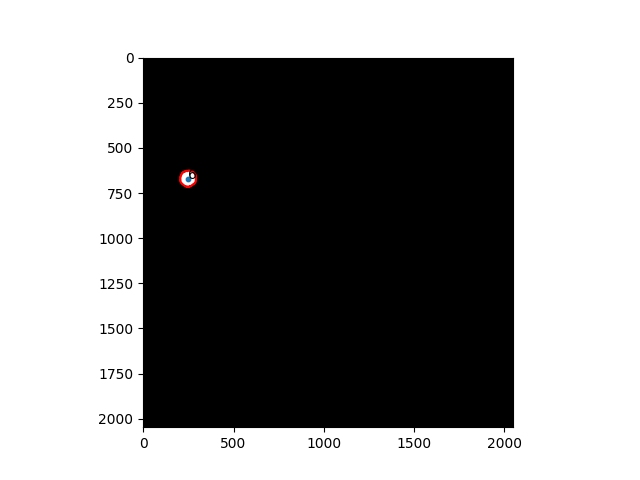

In [46]:
# plot a single particle and its contour and centroid
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(labels_image_threshold[0]==68, cmap='gray')
ax.scatter(properties[67].centroid[1], properties[67].centroid[0], 10)
ax.plot(contours[67][:, 1], contours[67][:, 0], color='red')
ax.annotate(properties[67].label, (properties[67].centroid[1], properties[67].centroid[0]))

plt.show()

<IPython.core.display.Javascript object>


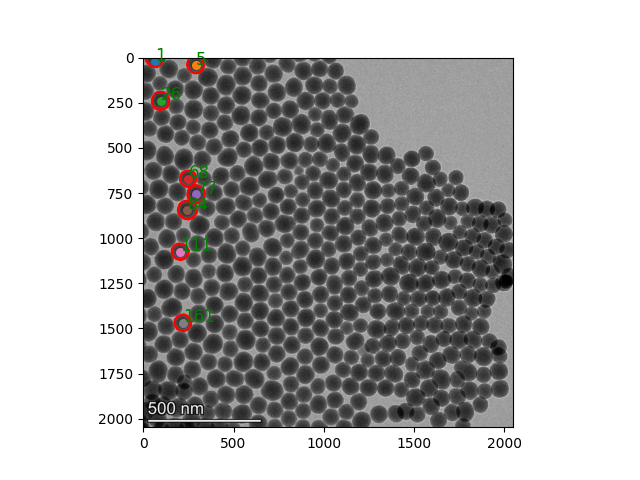

In [47]:
# select some labels of interest
label_of_interest = np.array([1, 5, 26, 68, 77, 84, 111, 161])
label_of_interest = label_of_interest - 1

# plot the contours and centroids of the selected regions
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image_smooth_sigma_1, cmap='gray')
for element in label_of_interest:
    ax.scatter(properties[element].centroid[1], properties[element].centroid[0], 30)
    ax.plot(contours[element][:, 1], contours[element][:, 0], color='red')
    ax.annotate(
        properties[element].label, 
        (properties[element].centroid[1] + 2 , properties[element].centroid[0] - 2), 
        color='green', 
        size=12
    )

C:\Users\allia\AppData\Local\Temp/ipykernel_15624/2041418838.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


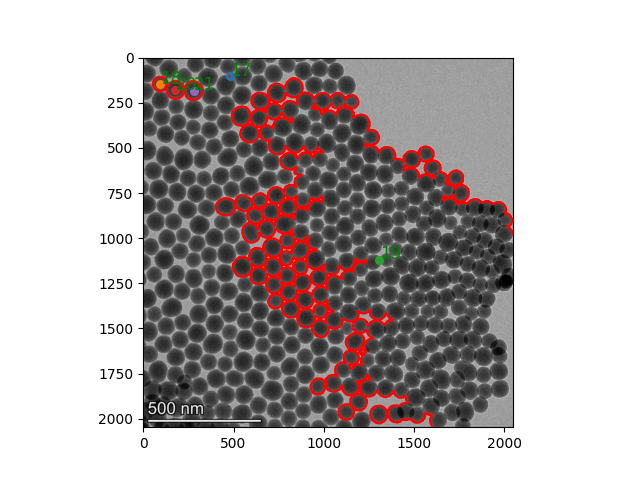

In [48]:
# Other labels of interest
label_of_interest = np.array([ 17, 18, 19, 20, 21])
label_of_interest = label_of_interest - 1

# plot the contours and centroids of the selected regions
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image_smooth_sigma_1, cmap='gray')
for element in label_of_interest:
    ax.scatter(properties[element].centroid[1], properties[element].centroid[0], 30)
    ax.plot(contours[element][:, 1], contours[element][:, 0], color='red')
    ax.annotate(
        properties[element].label, 
        (properties[element].centroid[1] + 2 , properties[element].centroid[0] - 2), 
        color='green', 
        size=12
    )

In [49]:
# Compute the properties of the identified particles
properties_table = measure.regionprops_table(
    labels_image_threshold[0], 
    properties=['label', 'area', 'centroid', 'perimeter']
)

In [50]:
# Print the table of properties
properties_table

{'label': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176,

In [51]:
# Filter the data based on area

indices_to_remove = []
properties_table_filtered = {}

for i in range(0, np.max(properties_table['label'])):
    if properties_table['area'][i] < 50 or properties_table['area'][i] > 10000:
        indices_to_remove.append(i)
        
for key in properties_table.keys():
    properties_table_filtered[key] = properties_table[key][~np.isin(np.arange(properties_table[key].size), indices_to_remove)]


In [52]:
print(properties_table_filtered)

{'label': array([  1,   2,   5,   6,   7,   8,   9,  10,  12,  13,  15,  16,  18,
        20,  21,  22,  23,  24,  26,  29,  30,  31,  34,  35,  36,  39,
        41,  42,  43,  47,  48,  49,  50,  52,  54,  55,  56,  59,  65,
        68,  69,  72,  73,  74,  75,  76,  77,  79,  80,  82,  84,  90,
        91,  92,  96,  99, 100, 101, 102, 106, 108, 109, 111, 112, 115,
       117, 118, 119, 122, 123, 124, 125, 129, 136, 137, 140, 141, 146,
       151, 153, 155, 158, 161, 162, 165, 168, 173, 174, 179, 182, 184,
       186, 187, 190, 198, 200, 202, 203, 211, 213, 217, 218, 220, 221,
       224, 226, 227]), 'area': array([4126,   87, 6545, 5181,  252, 9740, 6847, 1861, 8091, 5768, 8763,
       4913, 4971, 7447, 8268, 4622, 8486, 7194, 7603, 5624, 8571, 5186,
       6485, 6298, 6089, 5129, 5505, 6863, 7088, 5815, 7190, 6200, 6645,
       6617, 8657, 9875, 7349, 7505,  243, 6291, 5551, 8705, 2008, 6246,
       7786, 6938, 7509, 6397, 6823, 7050, 8343, 8076, 6760, 9289, 2150,
       6095, 5144

<IPython.core.display.Javascript object>


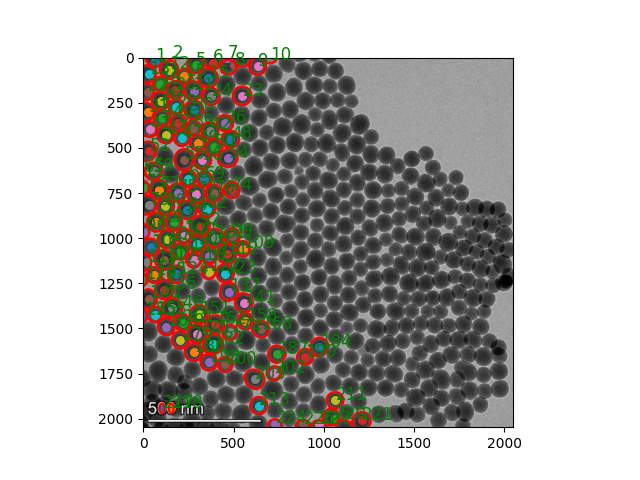

In [53]:
# Select all the labels of interest
label_of_interest = properties_table_filtered['label']
label_of_interest = label_of_interest - 1

# Plot the contours and centroids of the selected regions
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image_smooth_sigma_1, cmap='gray')
for element in label_of_interest:
    ax.scatter(properties[element].centroid[1], properties[element].centroid[0], 30)
    ax.plot(contours[element][:, 1], contours[element][:, 0], color='red')
    ax.annotate(
        properties[element].label, 
        (properties[element].centroid[1] + 2 , properties[element].centroid[0] - 2), 
        color='green', 
        size=12
    )

<IPython.core.display.Javascript object>


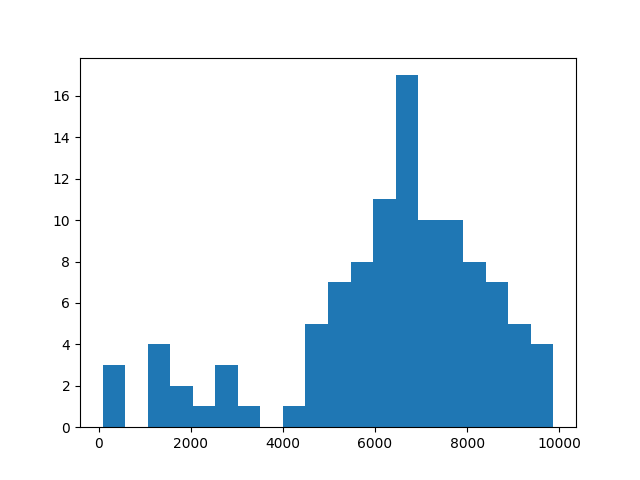

In [54]:
# Statistical representation of the relevant areas

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(properties_table_filtered['area'], 20)

plt.show()